In [46]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator

In [4]:
file= "english_tweets.csv"
twitter_df= pd.read_csv(file, index_col=0)

In [6]:
twitter_df.head()

,created_at,tweet,likes,retweet_count,country,continent,state,candidate,cleaned_tweet,detected_language
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,US,North America,Oregon,trump_df,trump as a student i used to hear for years fo...,en
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,US,North America,District of Columbia,trump_df,you get a tie and you get a tie trump s rally ...,en
5,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,US,North America,California,trump_df,her 15 minutes were over long time ago omarosa...,en
7,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,US,North America,Ohio,trump_df,there wont be many of them unless you all have...,en
8,2020-10-15 00:00:20,One of the single most effective remedies to e...,0.0,0.0,US,North America,Pennsylvania,trump_df,one of the single most effective remedies to e...,en


In [8]:
#converting created_at to datetime columm
twitter_df["created_at"]= pd.to_datetime(twitter_df["created_at"])

In [9]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293929 entries, 2 to 776872
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   created_at         293929 non-null  datetime64[ns]
 1   tweet              293929 non-null  object        
 2   likes              293929 non-null  float64       
 3   retweet_count      293929 non-null  float64       
 4   country            293929 non-null  object        
 5   continent          293929 non-null  object        
 6   state              293929 non-null  object        
 7   candidate          293929 non-null  object        
 8   cleaned_tweet      293929 non-null  object        
 9   detected_language  293929 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 24.7+ MB


Separating the data for trump and biden

In [20]:
trump_df= twitter_df[twitter_df["candidate"]=="trump_df"]
biden_df= twitter_df[twitter_df["candidate"]=="biden_df"]

Counting likes and retweets for Trump

In [25]:
trump_count= trump_df.resample("D", on='created_at')["likes", "retweet_count"].sum()
trump_count= trump_count.reset_index()

Counting likes and retweets for Biden

In [27]:
biden_count= biden_df.resample("D", on='created_at')["likes", "retweet_count"].sum()
biden_count= biden_count.reset_index()

In [66]:
biden_count.head()

,created_at,likes,retweet_count
0,2020-10-15,35641.0,14943.0
1,2020-10-16,259790.0,39356.0
2,2020-10-17,26342.0,11088.0
3,2020-10-18,32259.0,11152.0
4,2020-10-19,20358.0,8053.0


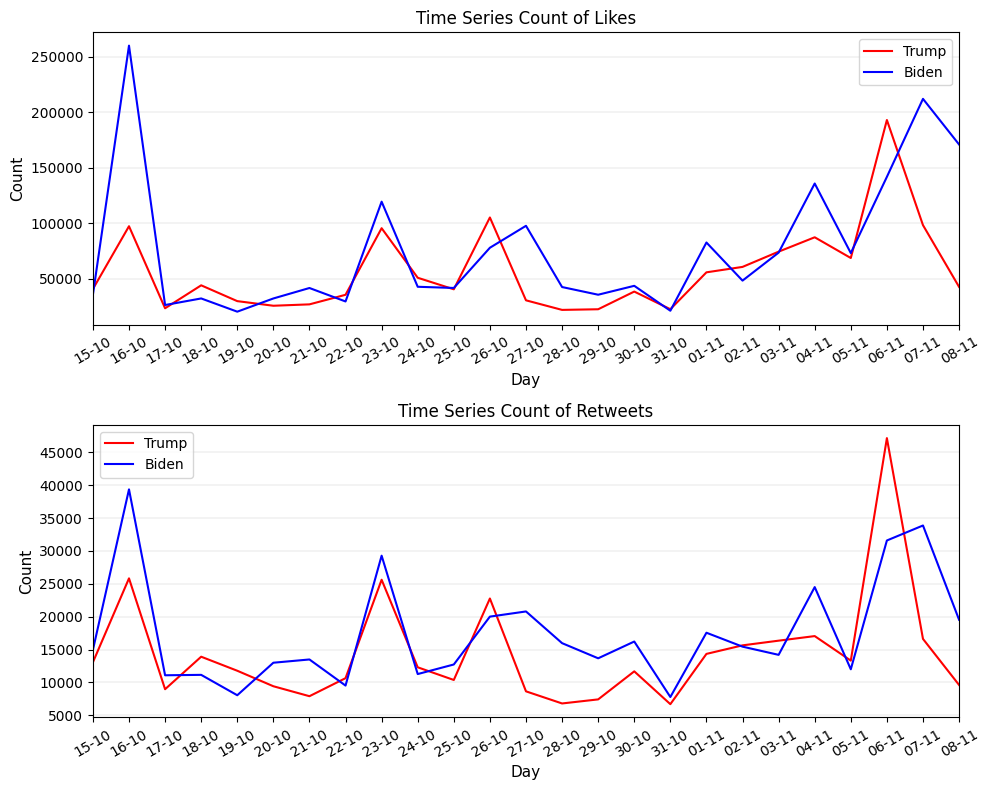

In [71]:
fig, axes= plt.subplots(2,1)
fig.set_size_inches(10,8)

# Define the columns to plot for each subplot
columns = ["likes", "retweet_count"]
titles = ["Likes", "Retweets"]

for index, ax in enumerate(axes.flat):
    trump_count.plot(ax=ax, x="created_at", y=columns[index], color= "red", label= "Trump")
    biden_count.plot(ax=ax, x="created_at", y=columns[index], color= "blue", label= "Biden")

    # Set major ticks to daily interval
    ax.xaxis.set_major_locator(DayLocator())  # Show ticks for each day

    # Set the date format on the x-axis to 'Day-Month'
    ax.xaxis.set_major_formatter(DateFormatter('%d-%m'))

    # Show the legend
    ax.legend()
    ax.set_xlabel("Day", fontsize=11)
    ax.set_ylabel("Count", fontsize= 11)
    ax.yaxis.grid(True, linewidth=0.2)
    ax.set_title(f"Time Series Count of {titles[index]}")

# Rotate x-tick labels for both subplots
for ax in axes.flat:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)

plt.tight_layout()
plt.show()